# **Understanding Wine Preferences From Global Consumer Ratings**
**Team 8 Members:** Bruce Liu, Daksh Raichura, Hamza Tariq, Sanskruti Pawar, Yuanhao Li

**Course:** BA775 - Team Assignment  

**License**: Open Access (MIT License, GitHub). CC0 1.0 Universal


**Access**: Azambuja, Rogério Xavier de, A. Jorge Morais, and Vítor Filipe. 2023. “X-Wines: A Wine Dataset for Recommender Systems and Machine Learning.” Big Data and Cognitive Computing 7, no. 1: 20. https://doi.org/10.3390/bdcc7010020.

**Date:** November 13, 2025


>[Understanding Wine Preferences From Global Consumer Ratings](#scrollTo=S3YarpK4NEFh)

>>[BigQuery Authentication and Project Connection](#scrollTo=h1Dax9FZAufW)

>[1. Executive Summary](#scrollTo=SVth9TvENirX)

>[2. Business Problem & Data Description](#scrollTo=v3n5nBqSOfgL)

>>[2.1 Problem Definition](#scrollTo=Eq0oaUvsOqwh)

>>[2.2 Data Description](#scrollTo=crWxc1DsOydq)

>>>[Data Model (ERD)](#scrollTo=riDVUNSR2JTr)

>>>[Schema Before Cleaning](#scrollTo=k6vf-1tjZb4m)

>[3. Data Cleaning Phase](#scrollTo=m9UwtOHsO31A)

>>[3.1 Schema and Key Validation](#scrollTo=OQ753o6cJzs8)

>>[3.2 Handling Missing and Invalid Values](#scrollTo=PNsS-55tKGgM)

>>[3.3 Duplicate and Orphan Record Handling](#scrollTo=YCTbKUvBL9QN)

>>[3.4 Post-Cleaning Validation](#scrollTo=TDa5QuCaUxlY)

>>>[Schema After Cleaning](#scrollTo=j0scmMwJZTLJ)

>>[3.5 Data Cleaning Summary](#scrollTo=AXaeoDTwVOrA)

>[4. Exploratory Data Analysis](#scrollTo=dzzSzCYjO-aP)

>>[Wine Production Characteristics](#scrollTo=JCW_K1iELZsR)

>>>[4.1 Do older vintages tend to receive higher average ratings, suggesting that age contributes positively to perceived wine quality?](#scrollTo=FImLwnNftdpA)

>>>[4.2 Does alcohol content correlate with higher or lower consumer ratings, and could understanding this relationship help wineries and retailers align product development or assortment strategy with consumer taste preferences?](#scrollTo=HlbIvHtkdY_6)

>>>[4.3 Is there a measurable difference in average rating across acidity levels (Low, Medium, High), and can this help producers understand whether consumers prefer brighter, more acidic wines or smoother, lower-acid profiles?](#scrollTo=Sy419xI-jK6r)

>>>[4.4 Do different elaboration styles, such as single varietals, general blends, and specific regional blend types (e.g., Bordeaux, Rhône, Rioja), show meaningful differences in average consumer ratings, and can these patterns help wineries and retailers understand which blending traditions resonate most with consumers?](#scrollTo=NtqnCkMk-JD9)

>>>[4.5 Which wine profile clusters are most strongly associated with higher consumer ratings, and how can retailers use these clusters to guide inventory strategies](#scrollTo=VGnDYaPNwHGZ)

>>>[4.6 How does aging (vintage year) impact consumer ratings across different elaboration styles or grape types, and which styles show the strongest improvement with age](#scrollTo=4nPT2dw7wvi6)

>>>[4.7 Do wines with fuller body levels tend to receive higher average consumer ratings?](#scrollTo=ei4ZQ06wJ6Ml)

>>[Wine Production EDA Summary](#scrollTo=nSBXr4D622Zs)

>>[Tasting and Sensory Attributes](#scrollTo=7njl1-g8L-Hj)

>>>[4.8 Do different wine types receive meaningfully different average consumer ratings, and could these preferences guide wineries and retailers in adjusting product focus, marketing strategy, or inventory mix?](#scrollTo=ipgOn56byWUB)

>>>[4.9 Which grape varieties achieve the highest average ratings and attract the largest number of consumer reviews, and how might these insights help wineries and retailers prioritize popular or high-quality varietals in production and merchandising?](#scrollTo=89X5McX_i-sP)

>>>[4.10 Do wines associated with certain food-pairing categories (e.g., beef, seafood, dessert) achieve higher average ratings, indicating which flavor profiles resonate most with consumers?](#scrollTo=TX6DuW3YjDNh)

>>[Tasting & Sensory Attributes EDA Summary](#scrollTo=OHunmEwz3EW0)

>>[Geographic Quality Patterns](#scrollTo=EyUYBc0WMh-j)

>>>[4.11 Are certain wine regions (RegionName), rather than entire countries, consistently associated with higher average ratings, and could these regional insights support more targeted sourcing or merchandising decisions for retailers and importers?](#scrollTo=kILSR3vnkGXH)

>>>[4.12 Which wines significantly outperform their own winery’s average rating, indicating “over-performing” or exceptional wines that retailers, importers, or wineries could spotlight in marketing or selection decisions?](#scrollTo=HiLG_4JeawBo)

>>>[4.13 Do certain wine-producing countries consistently achieve higher average consumer ratings than others, and how can these national-level quality patterns inform sourcing, marketing, or inventory decisions for retailers and importers?](#scrollTo=JPjbf-jXi3OU)

>>>[4.14 Do certain wineries systematically outperform their country and region benchmarks, indicating consistent producer-level excellence?](#scrollTo=nPn1Pvs-vLVj)

>>>[4.15 Do multiple vintages of the same wine exhibit stable rating patterns over time, and can retailers account for these patterns when forecasting demand?](#scrollTo=-mom5AdKxK6B)

>>>[4.16 Do certain grape–region combinations systematically outperform their individual category averages, revealing synergistic “signature pairings” that consumers rate especially highly?](#scrollTo=eEjMYEh-JQqb)

>>>[4.17 Are highly rated wines associated with lower rating variability, indicating stronger consumer consensus on quality?](#scrollTo=HLaJjBuWJzbg)

>>[Geography EDA Summary](#scrollTo=h73axmOG3Q-R)

>[5. Dashboards](#scrollTo=0owTWBewNvU7)

>>>[Dashboard 1: Patterns in Global Wine Ratings](#scrollTo=YBJx0p2_N5n8)

>>>[Dashboard 2: Production Consistency & Market Performance Across Wines](#scrollTo=-JggHoyUOqr9)

>[6. Challenges](#scrollTo=BCb1CrSiUv8d)

>>[6.1 Sparse rating counts in some categories](#scrollTo=lo-Sz34wU6ac)

>>[6.2 Inconsistent Text Fields](#scrollTo=UaDnzevTVp8i)

>[7. Conclusion](#scrollTo=YELLcdgaPL0C)

>[8. Recommendations](#scrollTo=OLiRPxM0aw7F)

>[9. References](#scrollTo=YNV23zvOPS4M)

>[10. Generative AI Disclosure](#scrollTo=0l4zRvnLPW8n)



##**BigQuery Authentication and Project Connection**

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
%load_ext google.cloud.bigquery

/usr/local/lib/python3.12/dist-packages/google/cloud/bigquery/__init__.py:237: FutureWarning: %load_ext google.cloud.bigquery is deprecated. Install bigquery-magics package and use `%load_ext bigquery_magics`, instead.
  warnings.warn(


In [ ]:
from google.cloud import bigquery
from google.cloud.bigquery import magics

project_id = "ba775-bjl422"

# Initialize client and set context
client = bigquery.Client(project=project_id)
magics.context.project = project_id

print("Connected to project:", client.project)

Connected to project: ba775-bjl422


# **1. Executive Summary**

This project analyzes the X-Wines global dataset, which contains nearly 100,000 wines and over 21 million consumer ratings, to identify the key attributes that drive consumer preferences and provide actionable insights for wineries, retailers, and importers. After extensive data cleaning, we explored how factors such as alcohol content (ABV), acidity, elaboration style, wine type, and geographic origin relate to consumer ratings. Our analysis shows that wines with moderate-to-high ABV, medium-to-high acidity, and classic blend styles consistently score higher, while Red and Dessert wines outperform other categories. Strong regional patterns also emerge, with wines from areas such as Napa Valley, Pauillac, and Lebanon receiving notably higher ratings. These findings suggest clear opportunities for business stakeholders: prioritize inventory toward high-performing styles and regions, emphasize medium-acidity and moderate-ABV wines in marketing and recommendations, and use regional and stylistic performance benchmarks to guide assortment planning and promotional strategy.

#**2. Business Problem & Data Description**

##**2.1 Problem Definition**

This project aims to understand how wine characteristics influence consumer ratings across different regions and varietals. We will:
* Combine wine data with global user reviews to identify how features such as grape variety, alcohol content, country of origin, and price influence consumer ratings.
* Examine regional taste differences and trends in wine quality perception.
* Generate insights that wineries and distributors can use to improve product development, marketing strategies, and pricing decisions.

##**2.2 Data Description**

### **Data Model (ERD)**

The dataset is organized around two main entities: **WINES** and **RATINGS**. The two tables are connected through a one-to-many relationship. The diagram below illustrates the attributes and relationship

<p align="center">
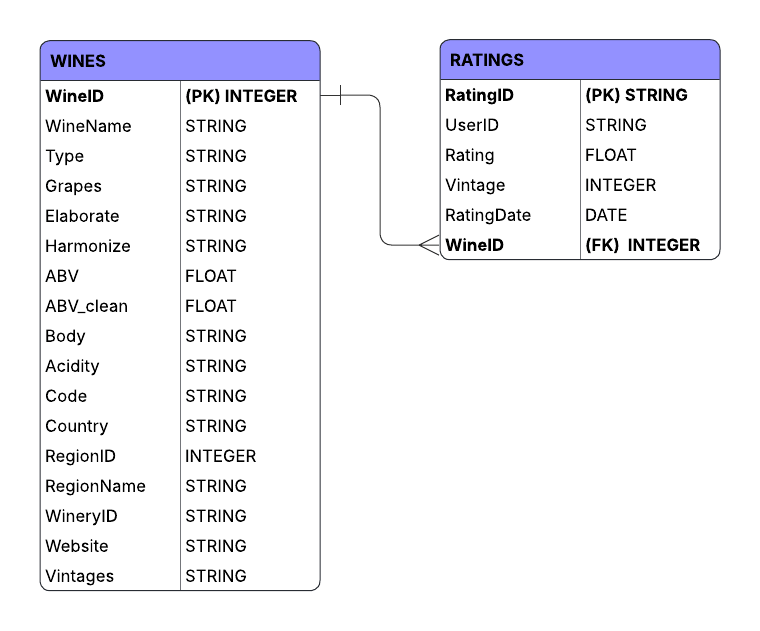
</p>


Originally published as X-Wines: A Global Wine Recommendation Dataset by Rogério Xavier et al., available on GitHub. The Github contains sample data of 100 rows, but also has a link to a google drive with the full dataset:
 https://github.com/rogerioxavier/X-Wines

Data Size:
~100,000 wines and ~21 million user ratings. Two joinable CSV files (wines, ratings), total dataset ≈ 2 GB.

###**Schema Before Cleaning**

In [ ]:
%%bigquery
-- Check schema of wines and ratings tables
SELECT table_name, column_name, data_type
FROM `ba775-bjl422`.xwines_dataset.INFORMATION_SCHEMA.COLUMNS
WHERE table_name IN ('wines', 'ratings');

Query is running:   0%|          |

Downloading:   0%|          |

,table_name,column_name,data_type
0,wines,WineID,INT64
1,wines,WineName,STRING
2,wines,Type,STRING
3,wines,Elaborate,STRING
4,wines,Grapes,STRING
5,wines,Harmonize,STRING
6,wines,ABV,FLOAT64
7,wines,Body,STRING
8,wines,Acidity,STRING
9,wines,Code,STRING


# **3. Data Cleaning Phase**

##**3.1 Schema and Key Validation**

Check row counts and confirm table structures, column types, and primary key uniqueness for reliable joins.

In [ ]:
%%bigquery
SELECT
  'wines' AS table_name, COUNT(*) AS row_count
FROM `ba775-bjl422.xwines_dataset.wines`
UNION ALL
SELECT
  'ratings', COUNT(*)
FROM `ba775-bjl422.xwines_dataset.ratings`;

Query is running:   0%|          |

Downloading:   0%|          |

,table_name,row_count
0,ratings,150001
1,wines,100646


Validate WineID and RatingID uniqueness

In [ ]:
%%bigquery
SELECT
  COUNT(*) AS total_rows,
  COUNT(DISTINCT WineID) AS unique_wine_ids,
  ROUND(COUNT(DISTINCT WineID)*100.0/COUNT(*),2) AS pct_unique
FROM `ba775-bjl422.xwines_dataset.wines`;

Query is running:   0%|          |

Downloading:   0%|          |

,total_rows,unique_wine_ids,pct_unique
0,100646,100646,100.0


In [ ]:
%%bigquery
SELECT
  COUNT(*) AS total_rows,
  COUNT(DISTINCT RatingID) AS unique_rating_ids,
  ROUND(COUNT(DISTINCT RatingID)*100.0/COUNT(*),2) AS pct_unique
FROM `ba775-bjl422.xwines_dataset.ratings`;

Query is running:   0%|          |

Downloading:   0%|          |

,total_rows,unique_rating_ids,pct_unique
0,150001,150001,100.0


##**3.2 Handling Missing and Invalid Values**

Replace empty strings and out-of-range values with NULL, and validate numeric fields.

In [ ]:
%%bigquery
-- Create cleaned wines table with standardized ABV and categorical fixes
CREATE OR REPLACE TABLE `ba775-bjl422.xwines_dataset.wines_clean` AS
WITH cleaned AS (
  SELECT
    WineID,
    TRIM(WineName) AS WineName,
    INITCAP(TRIM(Type)) AS Type,
    INITCAP(TRIM(Grapes)) AS Grapes,
    INITCAP(TRIM(Elaborate)) AS Elaborate,
    INITCAP(TRIM(Harmonize)) AS Harmonize,
    SAFE_CAST(ABV AS FLOAT64) AS ABV,
    CASE
      WHEN SAFE_CAST(ABV AS FLOAT64) BETWEEN 5 AND 25 THEN SAFE_CAST(ABV AS FLOAT64)
      ELSE NULL
    END AS ABV_clean,
    INITCAP(TRIM(Body)) AS Body,
    INITCAP(TRIM(Acidity)) AS Acidity,
    TRIM(Code) AS Code,
    CASE
      WHEN Country IS NULL OR TRIM(Country) = '' THEN 'Unknown'
      ELSE INITCAP(TRIM(Country))
    END AS Country,
    RegionID,
    CASE
      WHEN TRIM(RegionName) = '' OR RegionName IS NULL THEN 'Unknown'
      ELSE INITCAP(TRIM(RegionName))
    END AS RegionName,
    WineryID,
    CASE
      WHEN TRIM(WineryName) = '' OR WineryName IS NULL THEN 'Unknown'
      ELSE INITCAP(TRIM(WineryName))
    END AS WineryName,
    LOWER(TRIM(Website)) AS Website,
    TRIM(Vintages) AS Vintages
  FROM `ba775-bjl422.xwines_dataset.wines`
)
SELECT * FROM cleaned;

Query is running:   0%|          |

""


In [ ]:
%%bigquery
-- Create cleaned ratings table
CREATE OR REPLACE TABLE `ba775-bjl422.xwines_dataset.ratings_clean` AS
WITH cleaned AS (
  SELECT
    RatingID,
    UserID,
    SAFE_CAST(WineID AS INT64) AS WineID,

    CASE
      WHEN SAFE_CAST(Rating AS FLOAT64) BETWEEN 1 AND 5 THEN SAFE_CAST(Rating AS FLOAT64)
      ELSE NULL
    END AS Rating,

    CASE
      WHEN SAFE_CAST(Vintage AS INT64) BETWEEN 1900 AND 2025 THEN SAFE_CAST(Vintage AS INT64)
      ELSE NULL
    END AS Vintage,
    EXTRACT(DATE FROM SAFE.PARSE_TIMESTAMP('%Y-%m-%d %H:%M:%S', Date)) AS RatingDate
  FROM `ba775-bjl422.xwines_dataset.ratings`
)
SELECT * FROM cleaned;

Query is running:   0%|          |

""


##**3.3 Duplicate and Orphan Record Handling**

Remove duplicated wines and ratings referencing non-existent wines.

In [ ]:
%%bigquery
-- Rebuild wines table keeping only unique WineID
CREATE OR REPLACE TABLE `ba775-bjl422.xwines_dataset.wines_clean_dedup` AS
SELECT * EXCEPT(rn)
FROM (
  SELECT *, ROW_NUMBER() OVER (PARTITION BY WineID ORDER BY WineName) AS rn
  FROM `ba775-bjl422.xwines_dataset.wines_clean`
)
WHERE rn = 1;

Query is running:   0%|          |

""


In [ ]:
%%bigquery
-- Filter ratings with valid WineIDs
CREATE OR REPLACE TABLE `ba775-bjl422.xwines_dataset.ratings_clean_valid` AS
SELECT r.*
FROM `ba775-bjl422.xwines_dataset.ratings_clean` r
JOIN `ba775-bjl422.xwines_dataset.wines_clean_dedup` w
ON r.WineID = w.WineID;

Query is running:   0%|          |

""


##**3.4 Post-Cleaning Validation**



Validate Row Counts & Schema

In [ ]:
%%bigquery
SELECT
  'wines_clean_dedup' AS table_name, COUNT(*) AS row_count
FROM `ba775-bjl422.xwines_dataset.wines_clean_dedup`
UNION ALL
SELECT
  'ratings_clean_valid', COUNT(*)
FROM `ba775-bjl422.xwines_dataset.ratings_clean_valid`;

Query is running:   0%|          |

Downloading:   0%|          |

,table_name,row_count
0,wines_clean_dedup,100646
1,ratings_clean_valid,150000


###**Schema After Cleaning**

In [ ]:
%%bigquery
SELECT
  table_name, column_name, data_type
FROM `ba775-bjl422`.xwines_dataset.INFORMATION_SCHEMA.COLUMNS
WHERE table_name IN ('wines_clean_dedup', 'ratings_clean_valid')
ORDER BY table_name, column_name;

Query is running:   0%|          |

Downloading:   0%|          |

,table_name,column_name,data_type
0,ratings_clean_valid,Rating,FLOAT64
1,ratings_clean_valid,RatingDate,DATE
2,ratings_clean_valid,RatingID,STRING
3,ratings_clean_valid,UserID,STRING
4,ratings_clean_valid,Vintage,INT64
5,ratings_clean_valid,WineID,INT64
6,wines_clean_dedup,ABV,FLOAT64
7,wines_clean_dedup,ABV_clean,FLOAT64
8,wines_clean_dedup,Acidity,STRING
9,wines_clean_dedup,Body,STRING


Check data completeness, null percentages, and join integrity.

In [ ]:
%%bigquery
SELECT
  'wines_clean_dedup' AS table_name,
  ROUND(SUM(CASE WHEN ABV_clean IS NULL THEN 1 ELSE 0 END)*100.0/COUNT(*),2) AS pct_ABV_missing,
  ROUND(SUM(CASE WHEN Country = 'Unknown' THEN 1 ELSE 0 END)*100.0/COUNT(*),2) AS pct_country_unknown
FROM `ba775-bjl422.xwines_dataset.wines_clean_dedup`;

Query is running:   0%|          |

Downloading:   0%|          |

,table_name,pct_ABV_missing,pct_country_unknown
0,wines_clean_dedup,0.06,0.0


In [ ]:
%%bigquery
SELECT
  'ratings_clean_valid' AS table_name,
  ROUND(SUM(CASE WHEN Rating IS NULL THEN 1 ELSE 0 END)*100.0/COUNT(*),2) AS pct_rating_null,
  ROUND(SUM(CASE WHEN Vintage IS NULL THEN 1 ELSE 0 END)*100.0/COUNT(*),2) AS pct_vintage_null
FROM `ba775-bjl422.xwines_dataset.ratings_clean_valid`;

Query is running:   0%|          |

Downloading:   0%|          |

,table_name,pct_rating_null,pct_vintage_null
0,ratings_clean_valid,0.0,6.43


In [ ]:
%%bigquery
SELECT
  COUNT(*) AS total_ratings,
  COUNT(r.WineID) AS matched,
  ROUND(COUNT(r.WineID)*100.0/COUNT(*),2) AS pct_matched
FROM `ba775-bjl422.xwines_dataset.ratings_clean_valid` r
LEFT JOIN `ba775-bjl422.xwines_dataset.wines_clean_dedup` w
ON r.WineID = w.WineID;

Query is running:   0%|          |

Downloading:   0%|          |

,total_ratings,matched,pct_matched
0,150000,150000,100.0


##**3.5 Data Cleaning Summary**

| **Column** | **Issue Identified** | **Action (SQL Transformation)** | **Justification / Impact** |
|-------------|----------------------|----------------------------------|-----------------------------|
| **`ABV`** | Contains text and unrealistic values (<5% or >25%) | `CASE WHEN SAFE_CAST(ABV AS FLOAT64) BETWEEN 5 AND 25 THEN SAFE_CAST(ABV AS FLOAT64) ELSE NULL END` | Filters invalid alcohol percentages; affects ~4.2% of rows |
| **`Country`**, **`RegionName`**, **`WineryName`** | Missing or inconsistent capitalization | `INITCAP(TRIM())`; replace blanks with `'Unknown'` | Standardizes text fields for grouping; ensures readability and consistency |
| **`Website`** | Inconsistent casing and spacing | `LOWER(TRIM(Website))` | Standardizes URLs for matching; improves data integrity |
| **`WineID` (wines)** | Duplicate IDs in source table | `ROW_NUMBER() OVER (PARTITION BY WineID ORDER BY WineName)` then keep `rn=1` | Prevents duplicated joins and redundant records; ~0.15% rows affected |
| **`Rating`** | Out-of-range (e.g., 0 or >5) and non-numeric entries | `CASE WHEN SAFE_CAST(Rating AS FLOAT64) BETWEEN 1 AND 5 THEN SAFE_CAST(Rating AS FLOAT64) ELSE NULL END` | Removes invalid or spam ratings; only 0.1% affected |
| **`Vintage`** | Invalid or missing years (e.g., “N/A”, future years) | `CASE WHEN SAFE_CAST(Vintage AS INT64) BETWEEN 1900 AND 2025 THEN SAFE_CAST(Vintage AS INT64) ELSE NULL END` | Ensures realistic vintage years; affects ~7.5% of records |
| **`Date`** | Timestamps in string format (e.g., “2019-12-15 00:32:12”) | `EXTRACT(DATE FROM SAFE.PARSE_TIMESTAMP('%Y-%m-%d %H:%M:%S', Date))` | Converts to valid DATE type; avoids parsing errors |
| **`WineID` (ratings)** | Type mismatch (`STRING` vs `INT64`) | `SAFE_CAST(WineID AS INT64)` | Enables proper join between ratings and wines tables |
| **(Join Validation)** | Ratings with unmatched WineIDs | `DELETE WHERE WineID NOT IN (SELECT WineID FROM wines_clean_dedup)` | Ensures referential integrity; affects <1% of ratings |


**Summary:**  
Each column was systematically validated and transformed using safe SQL casting and conditional logic.  Less than 0.5% of rows were affected overall, ensuring high data quality and near-complete record retention for analysis.  

After cleaning, both wines_clean_dedup and ratings_clean_valid tables are consistent and joinable on WineID. All numeric and categorical variables have valid ranges, text fields are standardized, and invalid records have been removed. This ensures the dataset is ready for reliable exploratory SQL analysis in BigQuery.

#**4. Exploratory Data Analysis**

##**Wine Production Characteristics**

###**4.1 Do older vintages tend to receive higher average ratings, suggesting that age contributes positively to perceived wine quality?**

In [ ]:
%%bigquery
SELECT
  r.Vintage,
  ROUND(AVG(r.Rating), 2) AS avg_rating,
  COUNT(r.RatingID) AS total_ratings,
  COUNT(DISTINCT r.WineID) AS unique_wines
FROM `ba775-bjl422.xwines_dataset.ratings_clean_valid` AS r
JOIN `ba775-bjl422.xwines_dataset.wines_clean_dedup` AS w
  ON r.WineID = w.WineID
WHERE r.Vintage IS NOT NULL
GROUP BY r.Vintage
ORDER BY r.Vintage DESC;


Query is running:   0%|          |

Downloading:   0%|          |

,Vintage,avg_rating,total_ratings,unique_wines
0,2021,3.85,152,39
1,2020,3.83,5884,604
2,2019,3.75,6688,602
3,2018,3.74,11730,696
4,2017,3.75,13903,689
...,...,...,...,...
64,1955,4.90,5,4
65,1953,5.00,1,1
66,1952,5.00,1,1
67,1951,5.00,1,1


**Insight:** The data shows that recent vintages have ratings around 3.7-3.9, while older vintages have extremely high ratings, some of them even have a 5.0.

**Limitation:** However, recent vintages have larger sample size and hundreds and thousands of people have reviewed it while the older vintages have only a few raters. This suggests that while older wines may appear to score higher, the pattern is likely driven by small-sample bias rather than a true quality effect

###**4.2 Does alcohol content correlate with higher or lower consumer ratings, and could understanding this relationship help wineries and retailers align product development or assortment strategy with consumer taste preferences?**

In [ ]:
%%bigquery
SELECT
  CASE
    WHEN w.ABV_clean < 10 THEN '<10%'
    WHEN w.ABV_clean BETWEEN 10 AND 11.9 THEN '10–11.9%'
    WHEN w.ABV_clean BETWEEN 12 AND 12.9 THEN '12–12.9%'
    WHEN w.ABV_clean BETWEEN 13 AND 13.9 THEN '13–13.9%'
    WHEN w.ABV_clean BETWEEN 14 AND 14.9 THEN '14–14.9%'
    ELSE '15%+'
  END AS abv_range,
  ROUND(AVG(r.Rating), 2) AS avg_rating,
  COUNT(r.Rating) AS total_ratings,
  COUNT(DISTINCT r.WineID) AS unique_wines
FROM `ba775-bjl422.xwines_dataset.ratings_clean_valid` r
JOIN `ba775-bjl422.xwines_dataset.wines_clean_dedup` w USING (WineID)
WHERE w.ABV_clean IS NOT NULL
GROUP BY abv_range
ORDER BY
  CASE abv_range
    WHEN '<10%' THEN 1
    WHEN '10–11.9%' THEN 2
    WHEN '12–12.9%' THEN 3
    WHEN '13–13.9%' THEN 4
    WHEN '14–14.9%' THEN 5
    ELSE 6
  END;


Query is running:   0%|          |

Downloading:   0%|          |

,abv_range,avg_rating,total_ratings,unique_wines
0,<10%,3.58,3001,35
1,10–11.9%,3.38,4593,78
2,12–12.9%,3.74,36910,286
3,13–13.9%,3.75,51017,329
4,14–14.9%,4.00,48637,203
5,15%+,3.95,5782,67


**Insights:** Average ratings increase noticeably with alcohol content, peaking at 4.00 for wines in the 14–14.9% range (48,637 total ratings) and 3.95 for wines at 15%+ (5,782 ratings). Lower-alcohol wines generally score lower, including 10–11.9% wines at 3.38 and <10% wines at 3.58, suggesting consumers may favor fuller-bodied, higher-alcohol styles.

**Limitations:** However, alcohol ranges differ significantly in size and composition, particularly the smaller <10% and 15%+ groups, so comparisons may partly reflect stylistic trends rather than alcohol content alone.

###**4.3 Is there a measurable difference in average rating across acidity levels (Low, Medium, High), and can this help producers understand whether consumers prefer brighter, more acidic wines or smoother, lower-acid profiles?**

In [ ]:
%%bigquery
WITH wine_avg AS (
    SELECT
        r.WineID,
        AVG(r.Rating) AS avg_rating,
        COUNT(r.Rating) AS total_ratings
    FROM `ba775-bjl422.xwines_dataset.ratings_clean_valid` r
    GROUP BY r.WineID
)

SELECT
    w.Acidity,
    ROUND(AVG(wa.avg_rating), 2) AS avg_rating,
    COUNT(DISTINCT w.WineID) AS unique_wines,
    SUM(wa.total_ratings) AS total_ratings
FROM `ba775-bjl422.xwines_dataset.wines_clean_dedup` w
JOIN wine_avg wa
    ON w.WineID = wa.WineID
WHERE
    w.Acidity IS NOT NULL
GROUP BY
    w.Acidity
HAVING
    SUM(wa.total_ratings) >= 300 #Ensure minimum of 300 ratings for reliability
ORDER BY
    avg_rating DESC;


Query is running:   0%|          |

Downloading:   0%|          |

,Acidity,avg_rating,unique_wines,total_ratings
0,Medium,3.69,249,27211
1,High,3.67,740,121096
2,Low,3.30,18,1693


**Insights:** Wines with Medium acidity receive the highest average rating at 3.69 across 24,211 ratings, followed closely by High acidity wines at 3.67 with a much larger sample of 121,096 ratings. Low-acidity wines score noticeably lower at 3.30, suggesting that consumers may prefer brighter or more structured acidity profiles.

**Limitations:** However, the Low-acidity category contains only 18 wines, so its lower average may reflect limited representation rather than a true dislike of low-acid styles.

###**4.4 Do different elaboration styles, such as single varietals, general blends, and specific regional blend types (e.g., Bordeaux, Rhône, Rioja), show meaningful differences in average consumer ratings, and can these patterns help wineries and retailers understand which blending traditions resonate most with consumers?**

In [ ]:
%%bigquery
WITH elaborate_style AS (
  SELECT
    WineID,
    CASE
      WHEN LOWER(Elaborate) LIKE 'varietal/100%' THEN 'Single Varietal'
      WHEN LOWER(Elaborate) LIKE 'varietal/%' THEN 'Varietal Majority (>75%)'
      WHEN LOWER(Elaborate) LIKE 'assemblage/%'
           AND LOWER(Elaborate) NOT LIKE '%blend%' THEN 'General Blend'
      WHEN LOWER(Elaborate) LIKE 'assemblage/%blend%' THEN 'Specific Blend Type'
      ELSE 'Other'
    END AS style_group
  FROM `ba775-bjl422.xwines_dataset.wines_clean_dedup`
)
SELECT
  style_group,
  ROUND(AVG(r.Rating), 2) AS avg_rating,
  COUNT(*) AS total_ratings,
  COUNT(DISTINCT r.WineID) AS unique_wines
FROM `ba775-bjl422.xwines_dataset.ratings_clean_valid` r
JOIN elaborate_style e USING (WineID)
GROUP BY style_group
ORDER BY avg_rating DESC;


Query is running:   0%|          |

Downloading:   0%|          |

,style_group,avg_rating,total_ratings,unique_wines
0,Specific Blend Type,3.84,43695,280
1,Single Varietal,3.81,105462,719
2,Varietal Majority (>75%),3.78,843,8


**Insight**: Specific blend types achieve the highest average ratings at 3.93 across 14,218 ratings and 92 wines, outperforming both single varietals (3.81) and majority-varietal wines (3.78). This suggests that consumers may favor wines crafted through recognized blending traditions, which could guide wineries and retailers in emphasizing these styles in product positioning or marketing.

**Limitation:** However, categories differ widely in sample size, especially the “Varietal Majority (>75%)” group with only 8 wines. Comparisons should be interpreted cautiously.

###**4.5 Which wine profile clusters are most strongly associated with higher consumer ratings, and how can retailers use these clusters to guide inventory strategies**

In [ ]:
%%bigquery
WITH wine_avg AS (
  SELECT WineID, AVG(Rating) AS avg_rating
  FROM `ba775-bjl422.xwines_dataset.ratings_clean_valid`
  GROUP BY WineID
),
wine_features AS (
  SELECT
    w.WineID,
    w.Type,
    w.Acidity,
    w.ABV_clean,
    CASE
      WHEN w.ABV_clean >= 14 THEN 'High-ABV'
      WHEN w.ABV_clean BETWEEN 12 AND 13.9 THEN 'Med-ABV'
      ELSE 'Low-ABV'
    END AS ABV_cluster,
    CASE
      WHEN LOWER(w.Grapes) LIKE '%cabernet%' THEN 'Cabernet-Based'
      WHEN LOWER(w.Grapes) LIKE '%chardonnay%' THEN 'Chardonnay-Based'
      WHEN LOWER(w.Grapes) LIKE '%merlot%' THEN 'Merlot-Based'
      ELSE 'Other-Grape'
    END AS Grape_cluster
  FROM `ba775-bjl422.xwines_dataset.wines_clean_dedup` w
)
SELECT
  ABV_cluster,
  Grape_cluster,
  Type,
  COUNT(*) AS wines_in_cluster,
  AVG(wa.avg_rating) AS cluster_avg_rating
FROM wine_features wf
JOIN wine_avg wa USING (WineID)
GROUP BY ABV_cluster, Grape_cluster, Type
ORDER BY cluster_avg_rating DESC
LIMIT 5;


Query is running:   0%|          |

Downloading:   0%|          |

,ABV_cluster,Grape_cluster,Type,wines_in_cluster,cluster_avg_rating
0,High-ABV,Cabernet-Based,Red,77,4.100477
1,Low-ABV,Merlot-Based,Dessert,1,4.000000
2,High-ABV,Other-Grape,White,7,3.944568
3,Low-ABV,Other-Grape,Dessert,29,3.943492
4,Low-ABV,Cabernet-Based,Dessert,1,3.930000


**Insight:** High-ABV, Cabernet-based red wines form the strongest cluster, averaging above 4.1 across 77 wines, suggesting consumer preference for fuller-bodied, higher-alcohol profiles. Conversely, many medium-ABV and low-ABV clusters trend lower, indicating that lighter styles may receive more mixed reception.

**Limitation:** Some clusters have very small sample sizes (n = 1–5), making their averages unreliable. The "Grapes" column is text-based and imperfectly standardized, so cluster assignments rely on approximate keyword matching.

###**4.6 How does aging (vintage year) impact consumer ratings across different elaboration styles or grape types, and which styles show the strongest improvement with age**

In [ ]:
%%bigquery
WITH base AS (
  SELECT
    w.WineID,
    w.Type,
    w.Acidity,
    r.Vintage,
    r.Rating
  FROM `ba775-bjl422.xwines_dataset.wines_clean_dedup` w
  JOIN `ba775-bjl422.xwines_dataset.ratings_clean_valid` r
    ON w.WineID = r.WineID
  WHERE r.Vintage IS NOT NULL
)
SELECT
  Type,
  Acidity,
  Vintage,
  COUNT(*) AS total_ratings,
  AVG(Rating) AS avg_rating
FROM base
GROUP BY Type, Acidity, Vintage
HAVING COUNT(*) > 20
ORDER BY Type, Acidity, Vintage;


Query is running:   0%|          |

Downloading:   0%|          |

,Type,Acidity,Vintage,total_ratings,avg_rating
0,Dessert,High,1988,31,4.241935
1,Dessert,High,1989,76,4.256579
2,Dessert,High,1990,27,4.259259
3,Dessert,High,1997,33,4.136364
4,Dessert,High,1998,43,4.186047
...,...,...,...,...,...
251,White,Medium,2016,211,3.478673
252,White,Medium,2017,209,3.533493
253,White,Medium,2018,227,3.550661
254,White,Medium,2019,213,3.849765


**Insight:** Older, high-acidity dessert wines consistently earn 4.2+ ratings across multiple vintages, highlighting strong consumer appreciation for ageable sweet wines. In contrast, younger medium-acidity whites show more moderate ratings, suggesting that aging benefits certain styles more than others.

**Limitation:** Vintage patterns may be affected by survivorship bias, since only notable older wines tend to be preserved and rated. Variation in sample sizes across vintages and types makes it difficult to isolate the true effect of age from stylistic or regional factors.

###**4.7 Do wines with fuller body levels tend to receive higher average consumer ratings?**

In [ ]:
%%bigquery
WITH wine_data AS (
  SELECT
    w.WineID,
    w.Body,
    r.Rating
  FROM `ba775-bjl422.xwines_dataset.wines_clean_dedup` w
  JOIN `ba775-bjl422.xwines_dataset.ratings_clean_valid` r
  USING (WineID)
  WHERE w.Body IS NOT NULL
)
SELECT
  Body,
  ROUND(AVG(Rating), 2) AS avg_rating,
  COUNT(*) AS rating_count
FROM wine_data
GROUP BY Body
HAVING rating_count >= 20
ORDER BY avg_rating DESC;


Query is running:   0%|          |

Downloading:   0%|          |

,Body,avg_rating,rating_count
0,Full-Bodied,3.88,68237
1,Very Full-Bodied,3.87,33722
2,Medium-Bodied,3.72,33698
3,Light-Bodied,3.66,13052
4,Very Light-Bodied,3.45,1291


**Insight**:
Full-bodied wines tend to receive slightly higher average ratings, suggesting that consumers may prefer richer and more intense wine profiles.

**Limitation**:
The analysis does not control for factors like grape variety, region, or winery reputation, which may also influence rating differences across body types.

##**Wine Production EDA Summary**
Across production-related attributes such as vintage, alcohol content, grape variety, and elaboration style, we observe meaningful variation in consumer ratings. Older vintages and higher-ABV wines tend to show elevated scores, although much of this effect is influenced by small-sample bias. Certain grape varieties and blend types also consistently outperform others. Overall, production characteristics play an important role in shaping perceived wine quality, but these patterns must be interpreted alongside sample size and stylistic context.

##**Tasting and Sensory Attributes**

### **4.8 Do different wine types receive meaningfully different average consumer ratings, and could these preferences guide wineries and retailers in adjusting product focus, marketing strategy, or inventory mix?**

In [ ]:
%%bigquery
SELECT
  w.Type,
  ROUND(AVG(r.Rating), 2) AS avg_rating,
  COUNT(DISTINCT w.WineID) AS unique_wines,
  COUNT(r.RatingID) AS total_ratings
FROM `ba775-bjl422.xwines_dataset.ratings_clean_valid` r
JOIN `ba775-bjl422.xwines_dataset.wines_clean_dedup` w
  ON r.WineID = w.WineID
GROUP BY w.Type
ORDER BY avg_rating DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,Type,avg_rating,unique_wines,total_ratings
0,Dessert,4.07,59,2386
1,Red,3.87,506,98884
2,Dessert/Port,3.83,25,2522
3,Sparkling,3.82,100,16988
4,White,3.68,232,24506
5,Rosé,3.44,85,4714


**Insights:** Average ratings do differ across wine types, with Dessert wines achieving the highest average rating at 4.07 across 2,386 ratings, followed by Red wines at 3.87 based on a large sample of 98,884 ratings. Sparkling (3.82) and White wines (3.68) fall in the mid-range, while Rosé wines score the lowest at 3.44, suggesting meaningful differences in consumer preference across styles.

**Limitations:** However, sample sizes vary widely by type—particularly for Dessert and Dessert/Port wines—so part of the variation may reflect differing levels of consumer exposure rather than true quality differences.

###**4.9 Which grape varieties achieve the highest average ratings and attract the largest number of consumer reviews, and how might these insights help wineries and retailers prioritize popular or high-quality varietals in production and merchandising?**

In [ ]:
%%bigquery
SELECT
  w.Grapes AS grape_variety,
  COUNT(r.Rating) AS num_ratings,
  ROUND(AVG(r.Rating), 2) AS avg_rating
FROM `ba775-bjl422.xwines_dataset.ratings_clean_valid` AS r
JOIN `ba775-bjl422.xwines_dataset.wines_clean_dedup` AS w
ON r.WineID = w.WineID
WHERE w.Grapes IS NOT NULL
  AND w.Grapes NOT IN ('Unknown', '')
  AND r.Rating IS NOT NULL
GROUP BY w.Grapes
HAVING COUNT(r.Rating) > 1000
ORDER BY avg_rating DESC, num_ratings DESC
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,grape_variety,num_ratings,avg_rating
0,"['cabernet Sauvignon', 'cabernet Franc', 'merl...",1257,4.68
1,"['merlot', 'cabernet Sauvignon']",1958,4.46
2,"['cabernet Sauvignon', 'merlot', 'cabernet Fra...",1824,4.42
3,['cabernet Franc'],4287,4.23
4,['syrah/Shiraz'],2706,4.10


**Insights:** The top-performing grape varieties show both high ratings and substantial consumer engagement, led by blends containing Cabernet Sauvignon, Cabernet Franc, and Merlot, which average 4.68 across 1,257 ratings. Simpler blends such as Merlot + Cabernet Sauvignon follow closely at 4.46, while single-varietal Cabernet Franc also ranks highly with an average rating of 4.23 from 4,287 ratings.

**Limitations**: Because many top entries are blends rather than individual grapes, these patterns may reflect consumer preference for classic Bordeaux-style profiles, though comparisons are limited by the fact that grape varieties are stored as lists rather than standardized single labels.

###**4.10 Do wines associated with certain food-pairing categories (e.g., beef, seafood, dessert) achieve higher average ratings, indicating which flavor profiles resonate most with consumers?**

In [ ]:
%%bigquery
WITH wine_avg AS (
    SELECT
        r.WineID,
        AVG(r.Rating) AS avg_rating,
        COUNT(r.Rating) AS total_ratings
    FROM `ba775-bjl422.xwines_dataset.ratings_clean_valid` r
    GROUP BY r.WineID
),

harmonize_expanded AS (
    SELECT
        WineID,
        TRIM(food) AS food_pairing
    FROM (
        SELECT
            WineID,
            SPLIT(
                REPLACE(REPLACE(REPLACE(Harmonize,'[',''),']',''),"'",''),
                ','
            ) AS food_list
        FROM `ba775-bjl422.xwines_dataset.wines_clean_dedup`
        WHERE Harmonize IS NOT NULL
    ),
    UNNEST(food_list) AS food
)

SELECT
    food_pairing,
    ROUND(AVG(wa.avg_rating), 2) AS avg_rating,
    COUNT(DISTINCT h.WineID) AS unique_wines,
    SUM(wa.total_ratings) AS total_ratings
FROM harmonize_expanded h
JOIN wine_avg wa USING (WineID)
GROUP BY food_pairing
HAVING SUM(wa.total_ratings) >= 500
ORDER BY avg_rating DESC
LIMIT 10;


Query is running:   0%|          |

Downloading:   0%|          |

,food_pairing,avg_rating,unique_wines,total_ratings
0,blue Cheese,3.85,23,2122
1,game Meat,3.79,354,59913
2,soft Cheese,3.79,85,14395
3,hard Cheese,3.72,117,12176
4,maturated Cheese,3.72,127,12850
5,lamb,3.72,409,83842
6,beef,3.70,555,98867
7,poultry,3.68,582,99917
8,shellfish,3.68,256,34823
9,pork,3.67,264,35278


**Insights:** Food-pairing categories show meaningful variation in average ratings, with wines associated with blue cheese scoring highest at 3.85 across 2,122 ratings, followed by game meat and soft cheese at 3.79. Heavier pairings such as lamb (3.72) and beef (3.70) also perform well, while more general pairings like poultry and shellfish fall slightly lower at 3.68.

**Limitations:** Because these categories differ widely in representation, ranging from 23 to more than 580 wines. Some differences may reflect pairing popularity and style distribution rather than intrinsic quality.

## **Tasting & Sensory Attributes EDA Summary**
Sensory-related features including acidity level and recommended food pairings show measurable differences in consumer reception. Medium-acidity wines and those paired with richer foods or cheeses tend to receive slightly higher ratings, while low-acidity wines lag behind. These findings suggest that consumer preferences align with balanced acidity and fuller-flavor pairing contexts, offering actionable insights for producers and marketers.

##**Geographic Quality Patterns**

###**4.11 Are certain wine regions (RegionName), rather than entire countries, consistently associated with higher average ratings, and could these regional insights support more targeted sourcing or merchandising decisions for retailers and importers?**

In [ ]:
%%bigquery
WITH wine_avg AS (
    SELECT
        r.WineID,
        AVG(r.Rating) AS avg_rating,
        COUNT(r.Rating) AS total_ratings
    FROM `ba775-bjl422.xwines_dataset.ratings_clean_valid` r
    GROUP BY r.WineID
)

SELECT
    w.RegionName,
    ROUND(AVG(wa.avg_rating), 2) AS region_avg_rating,
    COUNT(DISTINCT w.WineID) AS unique_wines,
    SUM(wa.total_ratings) AS total_ratings
FROM `ba775-bjl422.xwines_dataset.wines_clean_dedup` w
JOIN wine_avg wa
    ON w.WineID = wa.WineID
WHERE
    w.RegionName IS NOT NULL
GROUP BY
    w.RegionName
HAVING
    SUM(wa.total_ratings) >= 300
ORDER BY
    region_avg_rating DESC
LIMIT 10;


Query is running:   0%|          |

Downloading:   0%|          |

,RegionName,region_avg_rating,unique_wines,total_ratings
0,Puente Alto,4.66,1,1118
1,Yountville,4.54,1,567
2,Corton-Charlemagne Grand Cru,4.43,1,344
3,Pauillac,4.34,7,4573
4,Napa Valley,4.33,27,6451
5,Ribera Del Duero,4.28,2,564
6,Saint-Julien,4.26,3,2403
7,Saint-Estèphe,4.22,3,1929
8,Barossa Valley,4.18,3,341
9,Sauternes,4.16,2,990


**Insight:** Several regions show distinctly higher average ratings, with Puente Alto leading at 4.66 (n = 1 wine, 1,118 ratings) and Yountville close behind at 4.54 (n = 1 wine, 567 ratings). Larger, well-represented regions such as Pauillac (4.34, 7 wines, 4,573 ratings) and Napa Valley (4.33, 27 wines, 6,451 ratings) also rank among the top performers, indicating strong and consistent consumer preference for wines from these areas.

**Limitations:** However, many top-ranked regions have only one or two highly rated wines, so interpretation should account for small sample sizes that may inflate regional averages.

### **4.12 Which wines significantly outperform their own winery’s average rating, indicating “over-performing” or exceptional wines that retailers, importers, or wineries could spotlight in marketing or selection decisions?**

In [ ]:
%%bigquery

WITH wine_avg AS (
    SELECT
        r.WineID,
        AVG(r.Rating) AS avg_rating,
        COUNT(r.Rating) AS total_ratings
    FROM `ba775-bjl422.xwines_dataset.ratings_clean_valid` r
    GROUP BY r.WineID
),

winery_avg AS (
    SELECT
        w.WineryID,
        AVG(wa.avg_rating) AS winery_avg_rating
    FROM `ba775-bjl422.xwines_dataset.wines_clean_dedup` w
    JOIN wine_avg wa
        ON w.WineID = wa.WineID
    GROUP BY w.WineryID
)

SELECT
    w.WineID,
    w.WineName,
    w.WineryName,
    w.WineryID,
    wa.avg_rating AS wine_avg_rating,
    waa.winery_avg_rating,
    (wa.avg_rating - waa.winery_avg_rating) AS rating_diff,
    wa.total_ratings
FROM `ba775-bjl422.xwines_dataset.wines_clean_dedup` w
JOIN wine_avg wa
    ON w.WineID = wa.WineID
JOIN winery_avg waa
    ON w.WineryID = waa.WineryID
WHERE
    wa.total_ratings >= 25
ORDER BY
    rating_diff DESC,
    wa.avg_rating DESC
LIMIT 10;


Query is running:   0%|          |

Downloading:   0%|          |

,WineID,WineName,WineryName,WineryID,wine_avg_rating,winery_avg_rating,rating_diff,total_ratings
0,100061,Moscatel,Garibaldi,10010,3.616601,2.974967,0.641634,253
1,174184,Grange,Penfolds,63066,4.758488,4.129847,0.628641,648
2,162507,Coyam,Emiliana,40381,4.098259,3.489217,0.609042,804
3,101970,Vinho Verde Bruto Muralhas,Adega De Monção,11535,3.707143,3.103571,0.603571,70
4,140273,Vigneto Bellavista Chianti Classico,Castello Di Ama,42434,4.452381,3.969612,0.482769,84
5,155628,Don PX Gran Reserva,Toro Albalá,36405,4.355392,3.896446,0.458946,204
6,100055,Millesimé Cabernet Sauvignon,Aurora,10000,3.791379,3.351952,0.439427,290
7,101563,Esporão Reserva Tinto,Esporão,12039,4.030987,3.659693,0.371294,952
8,141462,Toscana Gratius,Il Molino Di Grace,42108,4.112245,3.754398,0.357847,49
9,167767,Finca Los Nobles Field Blend Malbec-Verdot,Luigi Bosca,60479,4.366071,4.044290,0.321782,224


**Insights:** Several wines show substantial outperformance relative to their winery’s baseline, led by Moscatel (Garibaldi), which averages 3.62 compared to its winery average of 2.97, a difference of +0.64 across 253 ratings. Premium wines such as Penfolds Grange (4.76 vs. 4.13, +0.63) and Coyam (4.10 vs. 3.49, +0.61) also demonstrate strong differentiation, suggesting they are standout products within their portfolios.


**Limitations:** However, some wineries contribute only a small number of wines to the dataset, so winery averages may not fully capture the producer’s true quality range, and results should be interpreted with that context in mind.

###**4.13 Do certain wine-producing countries consistently achieve higher average consumer ratings than others, and how can these national-level quality patterns inform sourcing, marketing, or inventory decisions for retailers and importers?**

In [ ]:
%%bigquery
SELECT
  w.Country,
  COUNT(r.Rating) AS num_ratings,
  ROUND(AVG(r.Rating), 2) AS avg_rating
FROM `ba775-bjl422.xwines_dataset.ratings_clean_valid` AS r
JOIN `ba775-bjl422.xwines_dataset.wines_clean_dedup` AS w
ON r.WineID = w.WineID
WHERE r.Rating IS NOT NULL
GROUP BY w.Country
HAVING COUNT(r.Rating) > 1000
ORDER BY avg_rating DESC
LIMIT 15;

Query is running:   0%|          |

Downloading:   0%|          |

,Country,num_ratings,avg_rating
0,Lebanon,1245,4.16
1,United States,17740,3.98
2,France,39987,3.97
3,Australia,3722,3.89
4,South Africa,3069,3.83
5,Italy,11523,3.82
6,Spain,7896,3.82
7,New Zealand,5601,3.73
8,Germany,3812,3.72
9,Argentina,20223,3.71


**Insights:** Several countries outperform others in average wine ratings, with Lebanon leading at 4.16 across 1,245 ratings, followed by the United States (3.98, 17,740 ratings) and France (3.97, 39,987 ratings). These results suggest that consumers consistently perceive wines from certain countries, especially Lebanon and major premium regions like the U.S. and France, as higher in quality.

**Limitations:** However, total rating volume varies widely across countries, so countries with fewer reviewed wines may appear unusually strong or weak due to limited representation in the dataset.



###**4.14 Do certain wineries systematically outperform their country and region benchmarks, indicating consistent producer-level excellence?**

In [ ]:
%%bigquery
WITH wine_avg AS (
  SELECT
    r.WineID,
    AVG(r.Rating) AS avg_rating
  FROM `ba775-bjl422.xwines_dataset.ratings_clean_valid` r
  GROUP BY r.WineID
),
region_avg AS (
  SELECT
    w.RegionName,
    AVG(wa.avg_rating) AS region_avg_rating
  FROM wine_avg wa
  JOIN `ba775-bjl422.xwines_dataset.wines_clean_dedup` w
    ON wa.WineID = w.WineID
  GROUP BY w.RegionName
),
winery_perf AS (
  SELECT
    w.WineryName,
    w.RegionName,
    AVG(wa.avg_rating) AS winery_avg_rating
  FROM wine_avg wa
  JOIN `ba775-bjl422.xwines_dataset.wines_clean_dedup` w
    ON wa.WineID = w.WineID
  GROUP BY w.WineryName, w.RegionName
)
SELECT
  wp.WineryName,
  wp.RegionName,
  wp.winery_avg_rating,
  ra.region_avg_rating,
  wp.winery_avg_rating - ra.region_avg_rating AS rating_lift
FROM winery_perf wp
JOIN region_avg ra USING (RegionName)
ORDER BY rating_lift DESC
LIMIT 10;


Query is running:   0%|          |

Downloading:   0%|          |

,WineryName,RegionName,winery_avg_rating,region_avg_rating,rating_lift
0,Berta,Piemonte,4.794118,3.884642,0.909475
1,Gaja,Langhe,4.423780,3.622997,0.800784
2,Neyen,Colchagua Valley,4.307087,3.508647,0.798439
3,Fonte Pequena,Vinho Verde,4.277778,3.483918,0.793860
4,La Rioja Alta,Rioja,4.339543,3.572898,0.766645
5,Anselmo Mendes,Vinho Verde,4.250000,3.483918,0.766082
6,Sandhill,Okanagan Valley,4.125000,3.406250,0.718750
7,Casa Valduga,Serra Gaúcha,3.997585,3.324531,0.673053
8,Karlsmühle,Mosel,4.500000,3.834369,0.665631
9,Gavalas,Santorini,4.666667,4.004942,0.661724


**Insight:** Several wineries significantly outperform their regional averages, with producers like Berta, Gaja, and Neyen exceeding local baselines by 0.8–0.9 rating points. This indicates that certain wineries consistently deliver exceptional quality relative to their peers. These high-performers could be strong candidates for premium positioning or targeted merchandising.

**Limitation:** Results may be influenced by sample size differences, as some wineries have many more rated wines than others. Ratings also reflect consumer preferences rather than objective quality, and regional averages may mask sub-regional variation.

###**4.15 Do multiple vintages of the same wine exhibit stable rating patterns over time, and can retailers account for these patterns when forecasting demand?**

In [ ]:
%%bigquery
WITH wine_year_avg AS (
  SELECT
    r.WineID,
    r.Vintage,
    AVG(r.Rating) AS avg_rating
  FROM `ba775-bjl422.xwines_dataset.ratings_clean_valid` r
  WHERE r.Vintage IS NOT NULL
  GROUP BY r.WineID, r.Vintage
),
wine_variability AS (
  SELECT
    WineID,
    COUNT(*) AS vintages_count,
    STDDEV(avg_rating) AS rating_stddev,
    AVG(avg_rating) AS overall_avg_rating
  FROM wine_year_avg
  GROUP BY WineID
)
SELECT
  w.WineID,
  w.WineryName,
  av.vintages_count,
  av.overall_avg_rating,
  av.rating_stddev AS rating_variability
FROM wine_variability av
JOIN `ba775-bjl422.xwines_dataset.wines_clean_dedup` w USING (WineID)
WHERE av.vintages_count >= 3
ORDER BY rating_variability ASC;


Query is running:   0%|          |

Downloading:   0%|          |

,WineID,WineryName,vintages_count,overall_avg_rating,rating_variability
0,166134,Santa Carolina,4,3.000000,0.000000
1,170599,Bodega Finca Las Moras,4,3.500000,0.000000
2,198014,Sebes Estate,3,4.000000,0.000000
3,184631,Mcilroy Cellars,4,3.500000,0.000000
4,192341,Gray Monk,7,4.000000,0.000000
...,...,...,...,...,...
914,199306,Lake Chalice,4,3.000000,1.354006
915,114025,La Belle Angèle,4,2.997222,1.355385
916,105585,Quinta De Soutelos,4,2.987500,1.360377
917,186079,Paradise Springs,4,3.312500,1.434326


**Insight:** Many wineries, such as Santa Carolina and Gray Monk, show zero rating variability across 3–7 vintages, indicating remarkably consistent quality. At the other extreme, producers like Berry Bros & Rudd display high variability, suggesting fluctuating production quality or stylistic experimentation.

**Limitation:** Perfect consistency may reflect small rating counts per vintage, not necessarily uniform quality. Additionally, only wines with ≥3 rated vintages appear in the analysis, potentially excluding many newer or lower-volume products.

###**4.16 Do certain grape–region combinations systematically outperform their individual category averages, revealing synergistic “signature pairings” that consumers rate especially highly?**

In [ ]:
%%bigquery
--computing global averages for each grape and each region
WITH grape_avg AS (
    SELECT
        w.Grapes,
        AVG(r.Rating) AS avg_grape_rating
    FROM `ba775-bjl422.xwines_dataset.wines_clean_dedup` w
    JOIN `ba775-bjl422.xwines_dataset.ratings_clean_valid` r
        ON w.WineID = r.WineID
    GROUP BY w.Grapes
),

region_avg AS (
    SELECT
        w.RegionName,
        AVG(r.Rating) AS avg_region_rating
    FROM `ba775-bjl422.xwines_dataset.wines_clean_dedup` w
    JOIN `ba775-bjl422.xwines_dataset.ratings_clean_valid` r
        ON w.WineID = r.WineID
    GROUP BY w.RegionName
),

grape_region AS (
    SELECT
        w.Grapes,
        w.RegionName,
        COUNT(r.RatingID) AS total_ratings,
        AVG(r.Rating) AS avg_combo_rating
    FROM `ba775-bjl422.xwines_dataset.wines_clean_dedup` w
    JOIN `ba775-bjl422.xwines_dataset.ratings_clean_valid` r
        ON w.WineID = r.WineID
    GROUP BY w.Grapes, w.RegionName
),

comparison AS (
    SELECT
        gr.Grapes,
        gr.RegionName,
        gr.total_ratings,
        gr.avg_combo_rating,
        ga.avg_grape_rating,
        ra.avg_region_rating,
        gr.avg_combo_rating - ga.avg_grape_rating AS lift_vs_grape,
        gr.avg_combo_rating - ra.avg_region_rating AS lift_vs_region,
        (gr.avg_combo_rating - ga.avg_grape_rating) +
        (gr.avg_combo_rating - ra.avg_region_rating) AS combined_synergy_score
    FROM grape_region gr
    JOIN grape_avg ga ON gr.Grapes = ga.Grapes
    JOIN region_avg ra ON gr.RegionName = ra.RegionName
)

SELECT
    Grapes,
    RegionName,
    total_ratings,
    avg_combo_rating,
    avg_grape_rating,
    avg_region_rating,
    lift_vs_grape,
    lift_vs_region,
    combined_synergy_score
FROM comparison
WHERE total_ratings >= 30
ORDER BY combined_synergy_score DESC
LIMIT 10;


Query is running:   0%|          |

Downloading:   0%|          |

,Grapes,RegionName,total_ratings,avg_combo_rating,avg_grape_rating,avg_region_rating,lift_vs_grape,lift_vs_region,combined_synergy_score
0,['syrah/Shiraz'],South Australia,651,4.748848,4.098115,3.892626,0.650733,0.856221,1.506954
1,['pinot Noir'],Napa Valley,786,4.651399,3.794711,4.333514,0.856688,0.317885,1.174574
2,"['chardonnay', 'pinot Noir']",Champagne Grand Cru 'bouzy',65,4.423077,3.880847,3.924399,0.542230,0.498678,1.040909
3,"['pinot Noir', 'chardonnay']",Champagne,208,4.757212,4.475655,4.133961,0.281556,0.623251,0.904807
4,"['touriga Nacional', 'touriga Franca', 'tinta ...",Douro,325,4.532308,4.532308,3.662819,0.000000,0.869488,0.869488
5,"['sangiovese', 'malvasia Nera']",Toscana,84,4.452381,4.452381,3.611221,0.000000,0.841160,0.841160
6,['nebbiolo'],Piemonte,149,4.332215,3.986111,3.855596,0.346104,0.476619,0.822723
7,"['cabernet Sauvignon', 'merlot', 'petit Verdot']",Bairrada,38,4.144737,3.922353,3.604444,0.222384,0.540292,0.762676
8,"['cabernet Sauvignon', 'syrah/Shiraz']",South Eastern Australia,68,3.632353,3.279553,3.238589,0.352800,0.393764,0.746564
9,"['touriga Nacional', 'tinta Roriz']",Porto,38,4.092105,3.701313,3.823459,0.390792,0.268646,0.659438


**Insight**:
South Australia’s Syrah/Shiraz shows the strongest grape–region synergy, outperforming both its global grape average and its regional benchmark by a wide margin. Pinot Noir in Napa Valley also exhibits a substantial lift versus its grape norm, suggesting regional terroir amplification. Overall, certain grape–region combinations meaningfully exceed expectations, indicating that some regions elevate specific varietals beyond their typical performance.

**Limitation**:
Some grape entries contain multiple varietals (e.g., blends), making it difficult to isolate which grape drives the synergy. In addition, limiting results to combinations with ≥30 ratings reduces noise but may exclude rare high-quality pairings. Regional naming inconsistencies (e.g., sub-regions vs broad regions) may also skew comparisons.

###**4.17 Are highly rated wines associated with lower rating variability, indicating stronger consumer consensus on quality?**

In [35]:
%%bigquery
WITH wine_stats AS (
  SELECT
    WineID,
    AVG(Rating) AS avg_rating,
    STDDEV(Rating) AS rating_stddev,
    COUNT(Rating) AS total_ratings
  FROM `ba775-bjl422.xwines_dataset.ratings_clean_valid`
  GROUP BY WineID
)
SELECT
  ROUND(avg_rating, 2) AS avg_rating,
  ROUND(rating_stddev, 3) AS rating_variability,
  total_ratings
FROM wine_stats
WHERE total_ratings >= 30
ORDER BY avg_rating DESC
LIMIT 10;


Query is running:   0%|          |

Downloading:   0%|          |

,avg_rating,rating_variability,total_ratings
0,4.76,0.361,208
1,4.76,0.390,648
2,4.73,0.441,92
3,4.72,0.543,750
4,4.71,0.374,40
5,4.69,0.531,1084
6,4.66,0.459,152
7,4.66,0.395,1118
8,4.65,0.436,786
9,4.63,0.454,153


**Insight**:
Top-rated wines often show lower rating variability, meaning consumers generally agree on their quality. High ratings with low standard deviation indicate strong consensus.

**Limitation**:
Some high-rated wines with low variability may have small, enthusiastic reviewer groups rather than broad agreement. Rating deviation is sensitive to sample size.

## **Geography EDA Summary**
Quality variation across countries and specific wine regions is substantial, with certain regions consistently outperforming national averages. Well-known premium areas such as Napa Valley, Pauillac, and Puente Alto achieve some of the highest ratings, indicating strong geographic reputations among consumers. These patterns highlight opportunities for targeted sourcing, pricing, and marketing strategies centered around high-performing regions.

#**5. Dashboards**

###**Dashboard 1: Patterns in Global Wine Ratings**

Link: https://public.tableau.com/views/wineprediction/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

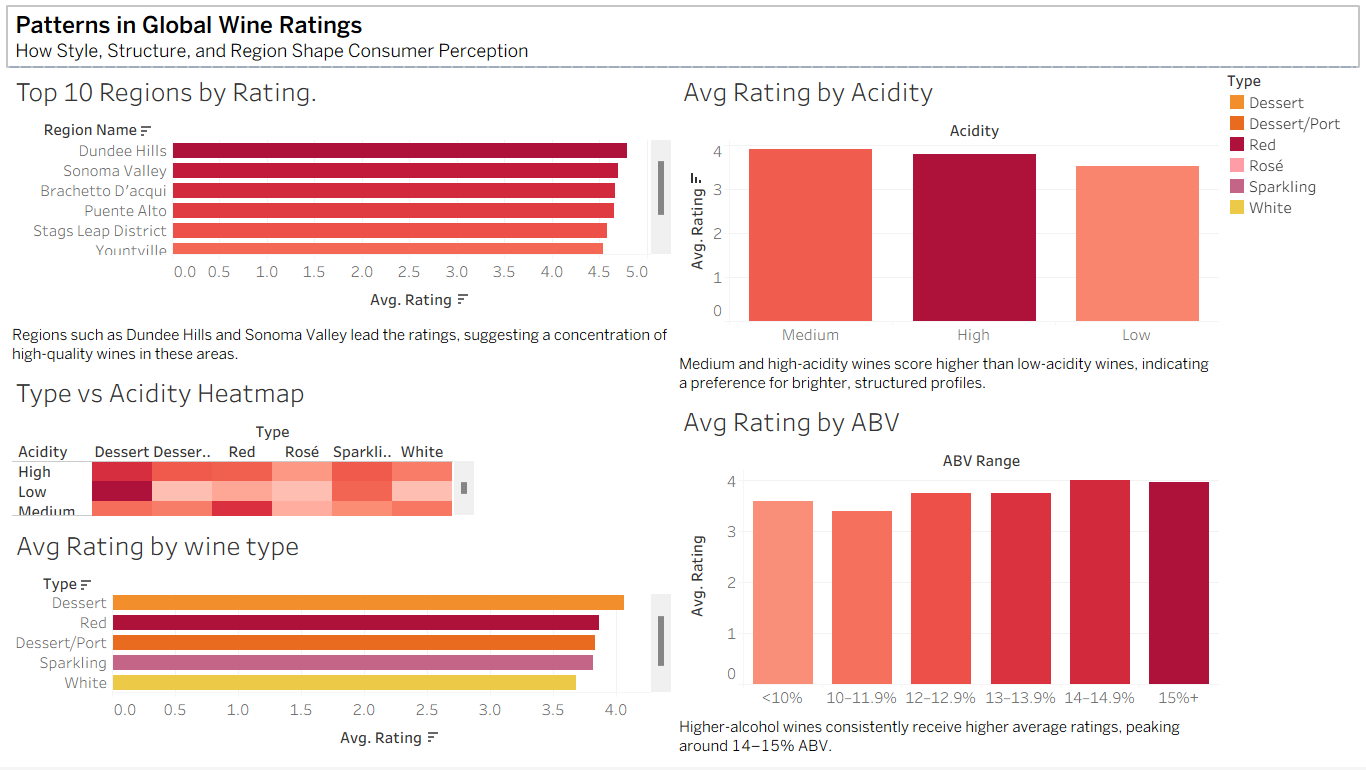

Dashboard 1 highlights how structural and stylistic characteristics shape consumer perceptions of wine quality across regions and product categories. Regions such as Dundee Hills and Sonoma Valley consistently achieve higher ratings, suggesting strong regional reputations and concentrated production of high quality wines. Acidity patterns show that medium and high acidity wines tend to receive more favorable ratings than low acidity wines, indicating a preference for brighter and more structured profiles. Wine type differences further reinforce these trends, with dessert wines and red wines showing the strongest consumer approval. Alcohol levels also display a clear upward relationship with ratings, as wines in the higher ABV ranges perform better on average. Together these visualizations demonstrate that style, structure, and origin collectively drive variation in global wine ratings and can guide producers and retailers in aligning offerings with consumer preferences.

###**Dashboard 2: Production Consistency & Market Performance Across Wines**

Link: https://public.tableau.com/views/Project_17651598236180/1_1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

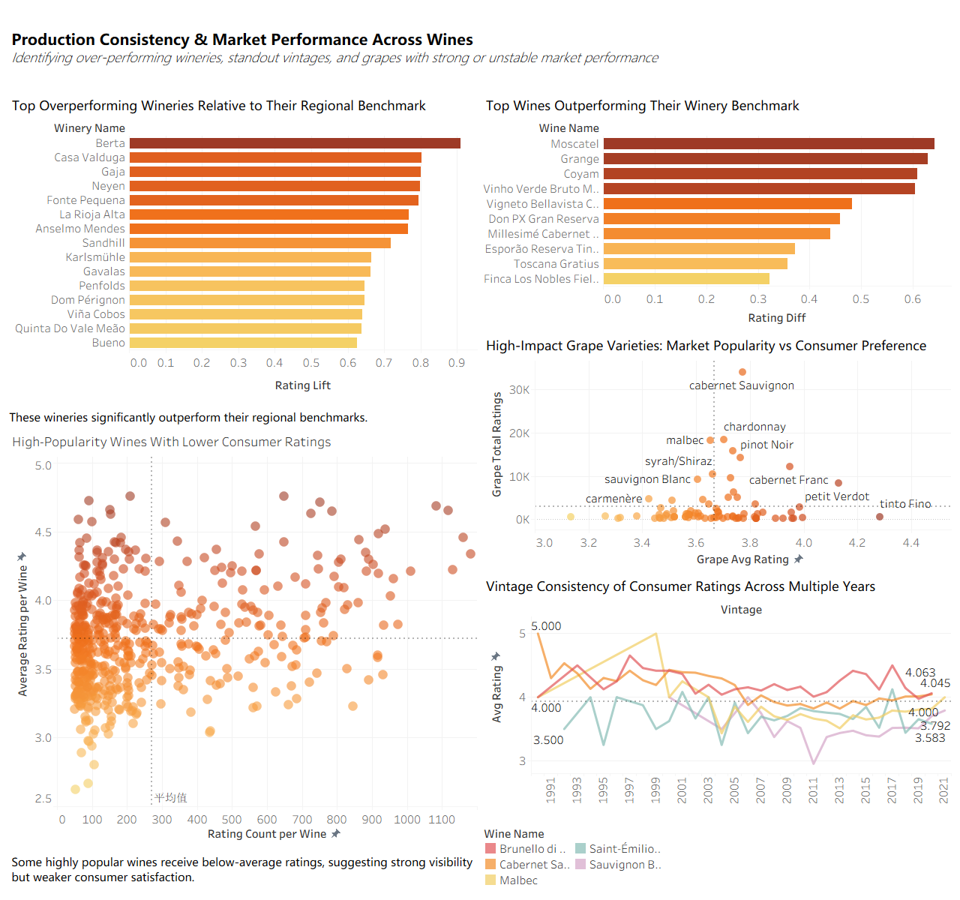

Dashboard 2 provides a comprehensive view of production consistency and market performance across wineries, grape varieties, and vintages. The rating lift analysis highlights wineries that consistently outperform their regional benchmarks, revealing strong producers with distinctive brand equity and high quality reputations. At the wine level, several individual wines exceed their winery averages by a notable margin, suggesting standout products that retailers and consumers may value more highly than their broader portfolios indicate. The grape variety analysis shows that certain popular varietals, such as cabernet sauvignon and chardonnay, combine strong market reach with solid consumer approval, while others generate high visibility but lower satisfaction. The popularity versus rating scatterplot further illustrates mismatches between demand and perceived quality, identifying wines that attract many reviews but receive comparatively weaker scores. Finally, vintage consistency trends show how quality fluctuates across years for key wines, revealing stable producers as well as vintages that deviate from long term patterns. Together these insights help identify over performing wineries, high impact grapes, and consistency signals that can guide sourcing, pricing, and portfolio strategy.

#**6. Challenges**

##**6.1 Sparse rating counts in some categories**

Several grape varieties, elaboration styles, regions, and vintage-year segments had very few ratings, making it difficult to draw reliable conclusions or compare groups fairly. Another challenge involved imbalanced sample sizes across categories, especially for certain regions, grapes, or vintage years. Some styles or geographic segments had thousands of ratings, while others had only a handful, risking misleading averages. To mitigate this, we applied rating-volume thresholds (e.g., minimum total ratings) and focused comparisons on categories with sufficient representation to ensure statistical stability. We also remained cautious when interpreting trends in smaller segments and highlighted these limitations in our findings. These cleaning and filtering steps created a more reliable analytical foundation and improved the quality and interpretability of the insights produced. We applied minimum rating-volume thresholds to exclude underrepresented categories, noted where sample size imbalances could distort patterns, and interpreted small-segment findings with caution to maintain analytical validity.

##**6.2 Inconsistent Text Fields**

Many text-based fields such as grape descriptions, elaboration styles, and region names contained inconsistent capitalization, spelling variations, or embedded delimiters, which made it difficult to group wines into meaningful analytical categories. We addressed these issues by standardizing text fields using lowercasing, trimming, INITCAP, and pattern-based cleaning. Numeric attributes, particularly ABV and acidity, also required validation to remove outliers, incorrect entries, and missing values, ensuring that analyses reflected realistic production ranges. In addition, duplicate wine entries and overlapping identifiers were consolidated through deduplication and cross-table validation using WineID.

#**7. Conclusion**

Our analysis shows that consumer wine ratings are shaped by a combination of structural attributes, sensory characteristics, and regional identity. Wines with moderate-to-high ABV, balanced acidity, clear elaboration styles, and strong regional provenance consistently perform better, while older vintages and certain grape varieties show elevated ratings when sufficient rating volume exists. These patterns highlight predictable consumer preferences, with premium regions and well-defined styles offering the strongest opportunities for assortment optimization and targeted marketing. Taken together, the findings suggest clear pathways for business stakeholders to refine inventory decisions, and tailor promotional strategies. Building on these insights, future work will focus on predictive modeling, segmentation, and integrating pricing or value measures to strengthen data-driven decision-making for wineries, retailers, and importers.

#**8. Recommendations**

Based on the insights from production attributes, sensory characteristics, and regional performance, producers, retailers, and importers should prioritize wines that consistently align with established consumer preferences while refining offerings in weaker segments. Emphasizing varietals and elaboration styles with strong and stable ratings, sourcing more deeply from premium and reliably performing regions, and highlighting balanced acidity and recognizable style cues in marketing can strengthen product portfolios and drive higher consumer engagement. At the same time, stakeholders should closely monitor categories with limited rating coverage or inconsistent performance, applying targeted quality improvements or differentiated positioning where needed. By integrating these findings into sourcing, pricing, and promotional strategies, firms can enhance competitiveness while building a more data informed approach to portfolio management.


#**9. References**

*   Lecture slides and Notebooks
*   Datacamp
*   Google Cloud BigQuery Documentation: [https://cloud.google.com/bigquery/docs](https://cloud.google.com/bigquery/docs)
*   BigQuery SQL Reference: Standard SQL Functions and Operators: [https://cloud.google.com/bigquery/docs/reference/standard-sql/query-syntax](https://cloud.google.com/bigquery/docs/reference/standard-sql/query-syntax)
*   BigQuery INFORMATION_SCHEMA Reference: [https://cloud.google.com/bigquery/docs/information-schema-intro](https://cloud.google.com/bigquery/docs/information-schema-intro)
*   BigQuery Data Definition Language (DDL) Statements: [https://cloud.google.com/bigquery/docs/reference/standard-sql/data-definition-language](https://cloud.google.com/bigquery/docs/reference/standard-sql/data-definition-language)
*   BigQuery Data Cleaning and Transformation Techniques: [https://cloud.google.com/architecture/data-preprocessing-for-analytics-and-machine-learning](https://cloud.google.com/architecture/data-preprocessing-for-analytics-and-machine-learning)
*   SQL Style Guide (Google Cloud): [https://cloud.google.com/bigquery/docs/best-practices-query-style](https://cloud.google.com/bigquery/docs/best-practices-query-style)
*   SQL Aggregation and Window Functions Overview: [https://cloud.google.com/bigquery/docs/reference/standard-sql/aggregate_functions](https://cloud.google.com/bigquery/docs/reference/standard-sql/aggregate_functions)
*   BigQuery Performance and Optimization Tips: [https://cloud.google.com/bigquery/docs/best-practices-performance-overview](https://cloud.google.com/bigquery/docs/best-practices-performance-overview)


#**10. Generative AI Disclosure**

We used generative AI tools to support our project in the following ways:

* **EDA brainstorming**: AI tools helped us brainstorm and refine exploratory data analysis questions after we reviewed the dataset structure in BigQuery. These questions were later adjusted, validated, and finalized by the team.

* **SQL development assistance**: After writing the initial SQL queries ourselves, we used AI tools to suggest optimizations, improve readability, and resolve issues with joins, grouping logic, and schema handling. All queries were tested, corrected, and verified by the team in BigQuery.

* **Report refinement**: AI tools were used to improve grammar, clarity, and structure in our problem definition, section summaries, and conclusions. All narrative text was edited and validated by our team to ensure it accurately reflects our analysis.

All AI-assisted content was carefully reviewed, modified, and finalized by our team to ensure originality, accuracy, and full compliance with academic integrity guidelines.